In [1]:
import numpy as np
from scipy import optimize, integrate, linalg as la
import matplotlib.pyplot as plt
from matplotlib import rc
#rc('text', usetex=True)

# Problem 1

In [2]:
def linearized_init(M, m, l, q1, q2, q3, q4, r):
    '''
    Parameters:
    ----------
    M, m: floats
        masses of the rickshaw and the present
    l   : float
        length of the rod
    q1, q2, q3, q4, r : floats
        relative weights of the position and velocity of the rickshaw,
        the angular displacement theta and the change in theta, 
        and the control
    
    Return
    -------
    A : ndarray of shape (4,4)
    B : ndarray of shape (4,1)
    Q : ndarray of shape (4,4)
    R : ndarray of shape (1,1)
    '''
    g = 9.8
    A = np.array([[0,1,0,0],
                  [0,0,m*g/M,0],
                  [0,0,0,1],
                  [0,0,(M+m)*g/(M*l),0]])
    B = np.array([0,1./M,0,1./(M*l)])
    Q = np.diag([q1,q2,q3,q4])
    R = np.array([r])
    return A,B,Q,R

# Problem 2

In [3]:
def find_P(A, B, Q, R):
    '''
    Parameters:
    ----------
    A, Q    : ndarrays of shape (4,4)
    B       : ndarray of shape (4,1)
    R       : ndarray of shape (1,1)
    Returns
    -------
    P       : the matrix solution of the Riccati equation
    '''
    def objective(p):
        P = p.reshape((4,4))
        return np.reshape(P@A + A.T@P + Q - np.outer(P@B,B.T@P)/R, 16)
    return np.reshape(optimize.root(objective, 
                                    np.eye(4).reshape(16))['x'], 
                      (4,4))    

In [4]:
A,B,Q,R = linearized_init(23.,5.,4.,1.,1.,1.,1.,10.)
P0 = find_P(A,B,Q,R)
print(la.eigvals(A - np.outer(B,B.T@P0)/R))

[-1.72875212+0.j          0.07538846+0.07490226j  0.07538846-0.07490226j
  1.72530814+0.j        ]


Yes, one of the eigenvalues is both real and positive. Two others have real part positive. Only one of the eigenvaluse has negative real part.

In [5]:
P1 = la.solve_continuous_are(A,B.reshape((4,1)),Q,R)
print(la.eigvals(A - np.outer(B,B.T@P1)/R))

[-1.72875212+0.j         -1.72530814+0.j         -0.07538846+0.07490226j
 -0.07538846-0.07490226j]


# Problem 3

In [6]:
def rickshaw(tv, X0, A, B, Q, R, P):
    '''
    Parameters:
    ----------
    tv  : ndarray of time values, with shape (n+1,)
    X0  : Initial conditions on state variables
    A, Q: ndarrays of shape (4,4)
    B   : ndarray of shape (4,1)
    R   : ndarray of shape (1,1)
    P   : ndarray of shape (4,4)
    Returns
    -------
    Z : ndarray of shape (n+1,4), the state vector at each time
    U : ndarray of shape (n+1,), the control values
    '''
    def ode(z,t):
        return (A - np.outer(B,B.T@P)/R).dot(z)
    Z = integrate.odeint(ode, X0, tv)
    #print(B.shape)
    #print(P.shape)
    #print(Z.shape)
    U = -np.dot(B,P@Z.T)/R
    return Z,U

# Problem 4

In [7]:
A,B,Q,R = linearized_init(23.,5.,4.,1.,1.,1.,1.,10.)
tv = None
X0 = np.array([-1,-1,.1,-.2])
P0 = find_P(A,B,Q,R)
P1 = la.solve_continuous_are(A,B.reshape((4,1)),Q,R)

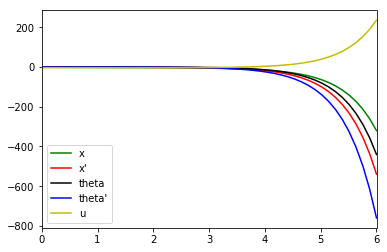

In [8]:
t0 = np.linspace(0,6)
Z0,U0 = rickshaw(t0,X0,A,B,Q,R,P0)
plt.plot(t0, Z0[:,0],'g', label=r'x')
plt.plot(t0, Z0[:,1],'r', label=r"x'")
plt.plot(t0, Z0[:,2],'k', label=r'theta')
plt.plot(t0, Z0[:,3],'b', label=r"theta'")
plt.plot(t0, U0,'y', label=r'u')
plt.legend()
plt.xlim(0,6)
plt.show()

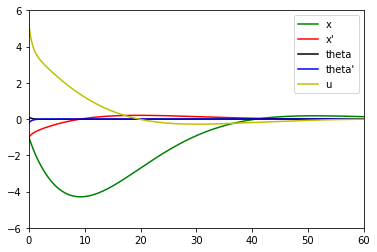

In [9]:
t1 = np.linspace(0,60,300)
Z1,U1 = rickshaw(t1,X0,A,B,Q,R,P1)
plt.plot(t1, Z1[:,0],'g', label=r'x')
plt.plot(t1, Z1[:,1],'r', label=r"x'")
plt.plot(t1, Z1[:,2],'k', label=r'theta')
plt.plot(t1, Z1[:,3],'b', label=r"theta'")
plt.plot(t1, U1,'y', label=r'u')
plt.legend()
plt.ylim(-6,6)
plt.xlim(0,60)
plt.show()